<a href="https://colab.research.google.com/github/jrojasquiroz/hppAI/blob/main/evacal/2-prep_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import sys

In [4]:
library_versions = {
    "python": sys.version,
    "pandas": pd.__version__,
    "numpy": np.__version__,
}

library_versions

{'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]',
 'pandas': '2.0.3',
 'numpy': '1.25.2'}

# Lista de participantes

In [ ]:
nombres = [
    "AD",
    "JCRQ",
    "GSG",
    "INHD",
    "LLVS",
    "PCLB",
    "RMMA",
    "RAT",
    "RAK",
    "TS",
    "VUJD",
    "BR"
]

# Distribución

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Documentos personales/9-Documentos Doctorado/Doctorado 2023/7-Clases/SRGVUA/evacal/cuarto_intento/rawdata/3-v-muestra_rmb-abril24.xlsx', sheet_name='Sheet1')
len(df)

3452

In [ ]:
df.head(2)

,ID,Title,Link,precio_euros,codigo_inmueble,Description,last_mod,dummy_indice,indice_alquiler,area,...,duplex,estudio,loft,piso,triplex,invalido,prob_sin_foto,qprecio,MUN,qprecio_municipio
0,10440,Piso en De la estación 20. Piso en venta en ...,https://www.habitaclia.com/comprar-piso-en_ven...,171500,Anuncio: 36906000006906,Piso totalmente exterior en Abrera: la viviend...,22/03/2024,0,0,85,...,0,0,0,1,0,0,0,1,Abrera,0.0
1,10575,Piso en Abrera. Piso para invertir,https://www.habitaclia.com/comprar-piso-para_i...,190000,Anuncio: 11056004061295,Si estas buscando un piso en Abrera para inver...,18/03/2024,0,0,97,...,0,0,0,1,0,0,0,1,Abrera,1.0


In [ ]:
df['C_contempo']=None
df['C_estado']=None
df['C_armarios']=None

df['B_contempo']=None
df['B_estado']=None
df['B_lavamano']=None

df['R_contempo']=None
df['R_estado']=None
df['R_carpinteria']=None
df['R_singular']=None
df['R_ventana']=None

df['dumi_precio_reduccion']=None
df['Precio_reduccion']=None
df['Anuncio_invalido']=None

In [ ]:
print(df.columns.tolist())

['ID', 'Title', 'Link', 'precio_euros', 'codigo_inmueble', 'Description', 'last_mod', 'dummy_indice', 'indice_alquiler', 'area', 'n_rooms', 'price_m2', 'n_baths', 'n_aseo', 'laundry', 'buhardilla', 'despacho', 'trastero', 'terrace', 'kwhm2_year', 'kgCO2m2_year', 'dummy_consum_EPC', 'dummy_emission_EPC', 'consum_A', 'consum_B', 'consum_C', 'consum_D', 'consum_E', 'consum_F', 'consum_G', 'emission_A', 'emission_B', 'emission_C', 'emission_D', 'emission_E', 'emission_F', 'emission_G', 'AC', 'parking', 'pool', 'lift', 'furniture', 'public_transp', 'barrio', 'codigo_inmueble_numero', 'Lat_Y', 'Lon_X', 'multifam', 'atico', 'duplex', 'estudio', 'loft', 'piso', 'triplex', 'invalido', 'prob_sin_foto', 'qprecio', 'MUN', 'qprecio_municipio', 'C_contempo', 'C_estado', 'C_armarios', 'B_contempo', 'B_estado', 'B_lavamano', 'R_contempo', 'R_estado', 'R_carpinteria', 'R_singular', 'R_ventana', 'dumi_precio_reduccion', 'Precio_reduccion', 'Anuncio_invalido']


Ahora dividiré 150 observaciones para Rolando, y el resto se dividen de manera equitativa entre el resto de participantes.

In [ ]:
# Ordenar la lista de nombres según la columna 'ID'
nombres_ordenados = sorted(nombres)

# Separar 150 observaciones para Rolando
df_sample = df.sample(frac=1).sort_values(by='ID')
df_br = df_sample.iloc[:150].copy()
df_br['Responsable'] = "BR"

# El resto del DataFrame después de separar las 150 observaciones
df_rest = df_sample.iloc[150:]

# Calcular el tamaño de cada parte para el resto de los nombres
nombres_restantes = nombres_ordenados.copy()
nombres_restantes.remove("BR")
part_size = len(df_rest) // len(nombres_restantes)
remainder = len(df_rest) % len(nombres_restantes)

# Dividir df_rest en partes equitativas
partes_df_rest = np.array_split(df_rest, len(nombres_restantes))

# Asignar los nombres a cada parte
for i, parte in enumerate(partes_df_rest):
    parte['Responsable'] = nombres_restantes[i]

# Concatenar las partes nuevamente en un solo DataFrame, incluyendo df_br
df_final = pd.concat([df_br] + partes_df_rest).reset_index(drop=True)

La siguiente celda es en caso quiera que toda la repartición sea equitativa (sin "guardar" 150 para una persona en particular).

In [ ]:
# Ordenar la lista de nombres según la columna 'ID'
#nombres_ordenados = sorted(nombres)

# Calcular el tamaño de cada parte
#part_size = len(df) // len(nombres_ordenados)
#remainder = len(df) % len(nombres_ordenados)

# Dividir df en partes
#partes_df = np.split(df.sample(frac=1).sort_values(by='ID'), np.cumsum([part_size] * (len(nombres_ordenados) - 1) + [part_size + remainder]))

# Asignar los nombres a cada parte
#for i, parte in enumerate(partes_df):
#    if i < len(nombres_ordenados):
#        parte['Responsable'] = nombres_ordenados[i]
#    else:
#        parte['Responsable'] = nombres_ordenados[-1]  # Asignar el último nombre en caso de que haya más partes que nombres

# Concatenar las partes nuevamente en un solo DataFrame
#df = pd.concat(partes_df)

In [ ]:
df_final['ID'] = (df_final.reset_index().index)+1

In [ ]:
df_final.to_excel('/content/drive/MyDrive/Documentos personales/9-Documentos Doctorado/Doctorado 2023/7-Clases/SRGVUA/evacal/cuarto_intento/data/v-muestra_rmb-abril24-responsables.xlsx', index=False)

# Visualización de la distribución

La muestra tiene un total de 3355 observaciones, que vienen de un dataset con 24k observaciones sólo con propiedades multifamiliares. Si fueran de todo tipo, tendríamos alrededor de 55k observaciones (más cercano a lo de años anteriores).

In [ ]:
#!pip install keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 20.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922315 sha256=0c51c0f636e3e22f78a5110879e5c23aa0157a1a46c9cfd1d28388cb7301c5f3
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


In [ ]:
#from keplergl import KeplerGl
#from google.colab import output
#output.enable_custom_widget_manager()
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [ ]:
mun=gpd.read_file('/content/drive/MyDrive/Datos/españa/vectores/MUNICIPOS-ESPAÑA-31N.gpkg')
univ=pd.read_excel('/content/drive/MyDrive/Documentos personales/9-Documentos Doctorado/Doctorado 2023/7-Clases/SRGVUA/evacal/cuarto_intento/rawdata/2-v-universo_rmb-abril24.xlsx')
muestra=pd.read_excel('/content/drive/MyDrive/Documentos personales/9-Documentos Doctorado/Doctorado 2023/7-Clases/SRGVUA/evacal/cuarto_intento/data/v-muestra_rmb-abril24-responsables.xlsx')


#### UNIVERSO
# Convertir el DataFrame a un GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(univ['Lon_X'], univ['Lat_Y'])]
crs = 'epsg:4326'  # Definir sistema de coordenadas WGS84
gdf_puntos = gpd.GeoDataFrame(univ, crs=crs, geometry=geometry)
# Convertir el GeoDataFrame a EPSG:32631
gdf_puntos = gdf_puntos.to_crs(epsg=32631)

#### MUESTRA
# Convertir el DataFrame a un GeoDataFrame
geometry2 = [Point(lon, lat) for lon, lat in zip(muestra['Lon_X'], muestra['Lat_Y'])]
gdf_puntos2 = gpd.GeoDataFrame(muestra, crs=crs, geometry=geometry2)
# Convertir el GeoDataFrame a EPSG:32631
gdf_puntos2 = gdf_puntos2.to_crs(epsg=32631)

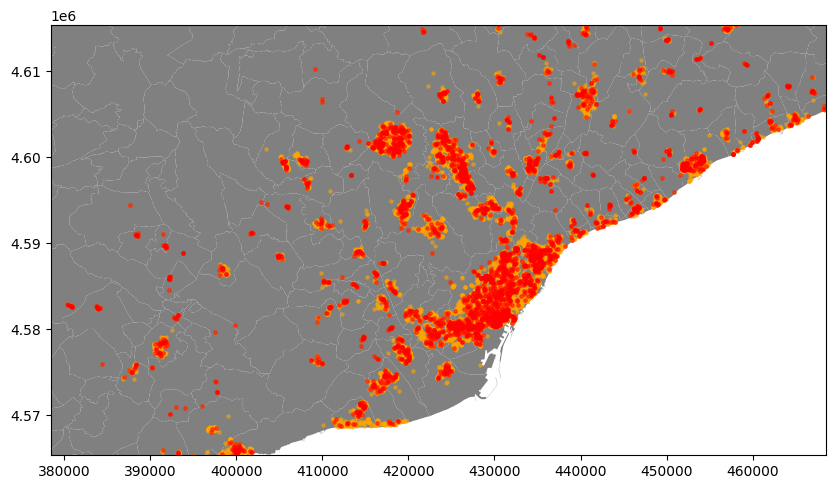

In [ ]:
# Calcular el centro de los puntos
center_point = gdf_puntos2.geometry.unary_union.centroid

# Visualizar los datos centrados en los puntos
fig, ax = plt.subplots(figsize=(10, 15))
mun.plot(ax=ax, color='gray')
gdf_puntos.plot(ax=ax, color='orange', markersize=5, alpha=0.5) ## UNIVERSO
gdf_puntos2.plot(ax=ax, color='red', markersize=6, alpha=0.5) ## MUESTRA
ax.set_xlim([center_point.x - 50000, center_point.x + 40000])  # Ajustar límites x para centrar en puntos
ax.set_ylim([center_point.y - 25000, center_point.y + 25000])  # Ajustar límites y para centrar en puntos
plt.show()

# Casos con y sin etiqueta EPC

En años anteriores vieron que aquellos casos sin información de su etiqueta (fijándose sólo en la letra) eran de peor calidad. Es decir, puede ser un proxy. Vamos a ver cómo se distribuyen estos casos en la muestra y en el universo.

Primero vemos la distribución en el universo.

In [ ]:
print("Con etiqueta EPC de consumo:", round(len(univ[univ['dummy_consum_EPC']==1])/len(univ)*100,2), "%", "-", len(univ[univ['dummy_consum_EPC']==1]))
print("Sin etiqueta EPC de consumo:", round(len(univ[univ['dummy_consum_EPC']==0])/len(univ)*100,2), "%", "-", len(univ[univ['dummy_consum_EPC']==0]))

Con etiqueta EPC de consumo: 97.96 % - 22638
Sin etiqueta EPC de consumo: 2.04 % - 471


In [ ]:
print("Con etiqueta EPC de emisiones:", round(len(univ[univ['dummy_emission_EPC']==1])/len(univ)*100,2), "%", "-", len(univ[univ['dummy_emission_EPC']==1]))
print("Sin etiqueta EPC de emisiones:", round(len(univ[univ['dummy_emission_EPC']==0])/len(univ)*100,2), "%", "-", len(univ[univ['dummy_emission_EPC']==0]))

Con etiqueta EPC de emisiones: 97.96 % - 22638
Sin etiqueta EPC de emisiones: 2.04 % - 471


Y ahora la muestra.

In [ ]:
print("Con etiqueta EPC de consumo:", round(len(muestra[muestra['dummy_consum_EPC']==1])/len(muestra)*100,2), "%", "-", len(muestra[muestra['dummy_consum_EPC']==1]))
print("Sin etiqueta EPC de consumo:", round(len(muestra[muestra['dummy_consum_EPC']==0])/len(muestra)*100,2), "%", "-", len(muestra[muestra['dummy_consum_EPC']==0]))

Con etiqueta EPC de consumo: 98.15 % - 3388
Sin etiqueta EPC de consumo: 1.85 % - 64


In [ ]:
print("Con etiqueta EPC de emisiones:", round(len(muestra[muestra['dummy_emission_EPC']==1])/len(muestra)*100,2), "%", "-", len(muestra[muestra['dummy_emission_EPC']==1]))
print("Sin etiqueta EPC de emisiones:", round(len(muestra[muestra['dummy_emission_EPC']==0])/len(muestra)*100,2), "%", "-", len(muestra[muestra['dummy_emission_EPC']==0]))

Con etiqueta EPC de emisiones: 98.15 % - 3388
Sin etiqueta EPC de emisiones: 1.85 % - 64


En general, se observa una distribución muy similar entre el universo y la muestra.

# Margen de error

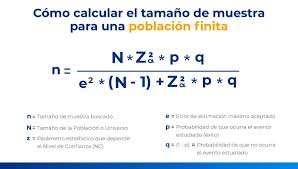

Tras haber despejado la fórmula del cálculo de muestra para una población finita, tengo la fórmula del error.

Esta es para los casos que **sí tienen etiqueta**.

In [ ]:
Z=1.96 #Al 95% de confianza
p=len(univ[univ['dummy_emission_EPC']==1])/len(univ) #Esta es la probabilidad de que un caso sí tenga etiqueta EPC
q=1-p
N=len(univ[univ['dummy_emission_EPC']==1])
n=len(muestra[muestra['dummy_emission_EPC']==1])

error_con_etiqueta=np.sqrt(((Z**2)*p*q*(N-n))/(n*(N-1)))
print(round(error_con_etiqueta*100,2), "%")

0.44 %


Esta es para los casos que **no tienen etiqueta**.

In [ ]:
Z=1.96 #Al 95% de confianza
p=len(univ[univ['dummy_emission_EPC']==0])/len(univ) #Esta es la probabilidad de que un caso no tenga etiqueta EPC
q=1-p
N=len(univ[univ['dummy_emission_EPC']==0])
n=len(muestra[muestra['dummy_emission_EPC']==0])

error_sin_etiqueta=np.sqrt(((Z**2)*p*q*(N-n))/(n*(N-1)))
print(round(error_sin_etiqueta*100,2), "%")

3.22 %
